# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach $m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [2]:
m = 10
A1, b1 = main.random_matrix_Ab(m)
A2, b2 = main.diag_dominant_matrix_A_b(m)
A3, b3 = main.symmetric_matrix_A_b(m)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

**solve()**

In [3]:
print(f'Warunki dla solve(): {main.solve_req(A1)}')

Warunki dla solve(): True


In [4]:
r_11 = np.linalg.solve(A1, b1)
norm_11 = main.residual_norm(A1, r_11, b1)

print('-----------------------------------------------------')
print(f'Dokładność rozwiązania funkcji solve(): {norm_11}')
print('-----------------------------------------------------')
print('Czas wykonania: ')
saved_timing = %timeit -r 5 -n 10 -o np.linalg.solve(A1, b1)
print('-----------------------------------------------------')

-----------------------------------------------------
Dokładność rozwiązania funkcji solve(): 1.072098405376252e-15
-----------------------------------------------------
Czas wykonania: 
16.6 µs ± 2.33 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
-----------------------------------------------------


**solve_jacobi()**

In [5]:
print(f'Warunki dla solve_jacobi(): {main.jacobi_req(A1)}')

Warunki dla solve_jacobi(): False


**cg()**

In [6]:
print(f'Warunki dla cg(): {main.cg_req(A1)}')

Warunki dla cg(): False


**gmres()**

In [7]:
print(f'Warunki dla gmres(): {main.gmres_req(A1)}')

Warunki dla gmres(): True


Text(0.5, 1.0, 'Norma rozwiązania metody gmres() w zalezności od ilości iteracji')

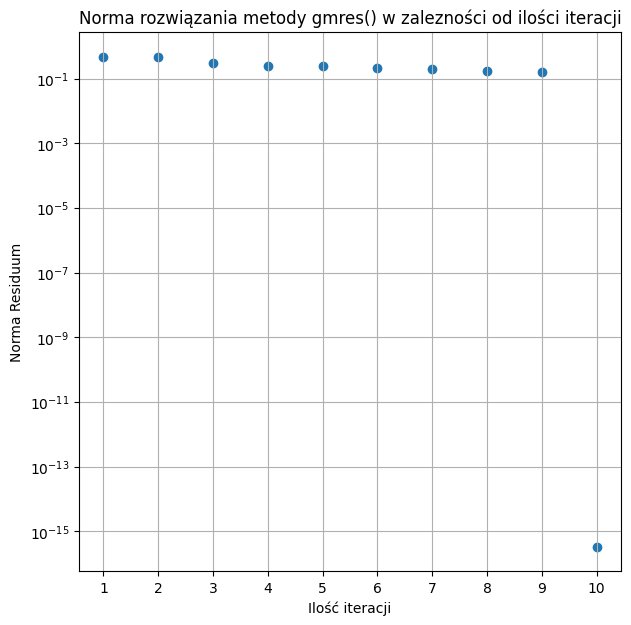

In [8]:
iter_14 = []
norm_14 = []
def c_func_14(y):
    norm_14.append(y)

r_14 = sp.sparse.linalg.gmres(A1, b1, restart=10, maxiter=1, callback=c_func_14, callback_type='pr_norm')
for i in range(1, len(norm_14)+1):
    iter_14.append(i)

fig1, gm_14 = plt.subplots(figsize=(7,7))
gm_14.scatter(iter_14, norm_14)
gm_14.set(yscale='log')
gm_14.set(xticks=iter_14)
gm_14.set(xlabel='Ilość iteracji', ylabel='Norma Residuum')
gm_14.grid()
gm_14.set_title('Norma rozwiązania metody gmres() w zalezności od ilości iteracji')

Text(0.5, 1.0, 'Czas wykonania metody gmres() w zalezności od ilości iteracji')

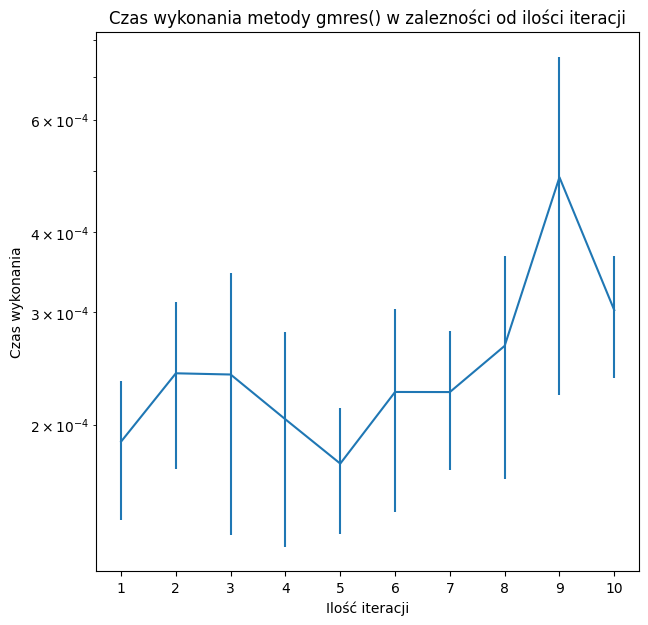

In [9]:
iterations = 10
iter_t14 = []
time_avg = np.zeros(iterations)
time_std_dev = np.zeros(iterations)
for i in range(1, iterations + 1):
    # print('Ilość iteracji: ', i)
    # print('Czas wykonania: ')
    saved_timing = %timeit -r 5 -n 10 -o -q sp.sparse.linalg.gmres(A1, b1, restart=i, maxiter=1)
    time_avg[i-1] = saved_timing.average
    time_std_dev[i-1] = saved_timing.stdev
    # print('-----------------------------------------------------')
    iter_t14.append(i)

fig2, gm_t14 = plt.subplots(figsize=(7,7))
gm_t14.errorbar(iter_t14, time_avg, yerr=time_std_dev)
gm_t14.set(yscale='log')
gm_t14.set(xticks=iter_t14)
gm_t14.set(xlabel='Ilość iteracji', ylabel='Czas wykonania')
gm_t14.set_title('Czas wykonania metody gmres() w zalezności od ilości iteracji')

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

**solve()**

In [10]:
print(f'Warunki dla solve(): {main.solve_req(A2)}')

Warunki dla solve(): True


In [11]:
r_21 = np.linalg.solve(A2, b2)
norm_21 = main.residual_norm(A2, r_21, b2)

print('-----------------------------------------------------')
print(f'Dokładność rozwiązania funkcji solve(): {norm_21}')
print('-----------------------------------------------------')
print('Czas wykonania: ')
saved_timing = %timeit -r 5 -n 10 -o np.linalg.solve(A2, b2)
print('-----------------------------------------------------')

-----------------------------------------------------
Dokładność rozwiązania funkcji solve(): 2.7012892057857038e-15
-----------------------------------------------------
Czas wykonania: 
The slowest run took 9.36 times longer than the fastest. This could mean that an intermediate result is being cached.
26 µs ± 30 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
-----------------------------------------------------


**solve_jacobi()**

In [12]:
print(f'Warunki dla solve_jacobi(): {main.jacobi_req(A2)}')

Warunki dla solve_jacobi(): True


Text(0.5, 1.0, 'Norma rozwiązania metody solve_jacobi() w zalezności od ilości iteracji')

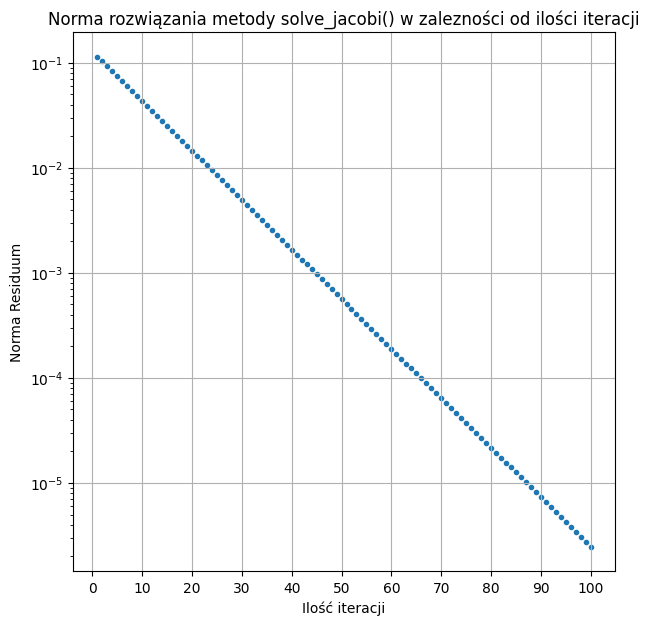

In [13]:
x_init = np.zeros((A2.shape[0],1))

r_22, norm_22 = main.solve_jacobi(A2, b2, x_init)
iter22 = len(norm_22)
iter_22 = np.arange(1,iter22+1,1)

fig3, j_22 = plt.subplots(figsize=(7,7))
j_22.scatter(iter_22, norm_22, marker='.')
j_22.set(yscale='log')
j_22.set(xticks=np.arange(0, iter22 + 1, 10))
j_22.set(xlabel='Ilość iteracji', ylabel='Norma Residuum')
j_22.grid()
j_22.set_title('Norma rozwiązania metody solve_jacobi() w zalezności od ilości iteracji')

Text(0.5, 1.0, 'Czas wykonania metody solve_jacobi() w zalezności od ilości iteracji')

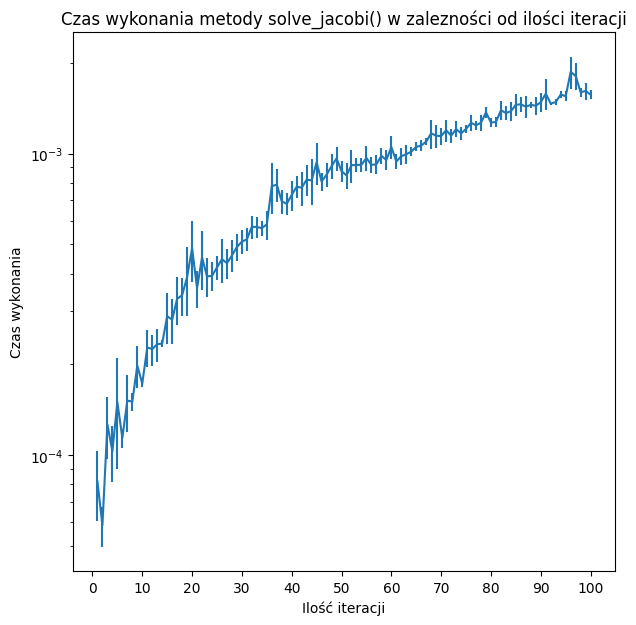

In [14]:
iterations = 100
iter_t22 = []
time_avg = np.zeros(iterations)
time_std_dev = np.zeros(iterations)
for i in range(1, iterations + 1):
    # print('Ilość iteracji: ', i)
    # print('Czas wykonania: ')
    saved_timing = %timeit -r 5 -n 10 -o -q main.solve_jacobi(A2, b2, x_init, maxiter=i)
    time_avg[i-1] = saved_timing.average
    time_std_dev[i-1] = saved_timing.stdev
    # print('-----------------------------------------------------')
    iter_t22.append(i)

fig4, j_t14 = plt.subplots(figsize=(7,7))
j_t14.errorbar(iter_t22, time_avg, yerr=time_std_dev)
j_t14.set(yscale='log')
j_t14.set(xticks=np.arange(0, iter22 + 1, 10))
j_t14.set(xlabel='Ilość iteracji', ylabel='Czas wykonania')
j_t14.set_title('Czas wykonania metody solve_jacobi() w zalezności od ilości iteracji')

**cg()**

In [15]:
print(f'Warunki dla cg(): {main.cg_req(A2)}')

Warunki dla cg(): False


**gmres()**

In [16]:
print(f'Warunki dla gmres(): {main.gmres_req(A2)}')

Warunki dla gmres(): True


Text(0.5, 1.0, 'Norma rozwiązania metody gmres() w zalezności od ilości iteracji')

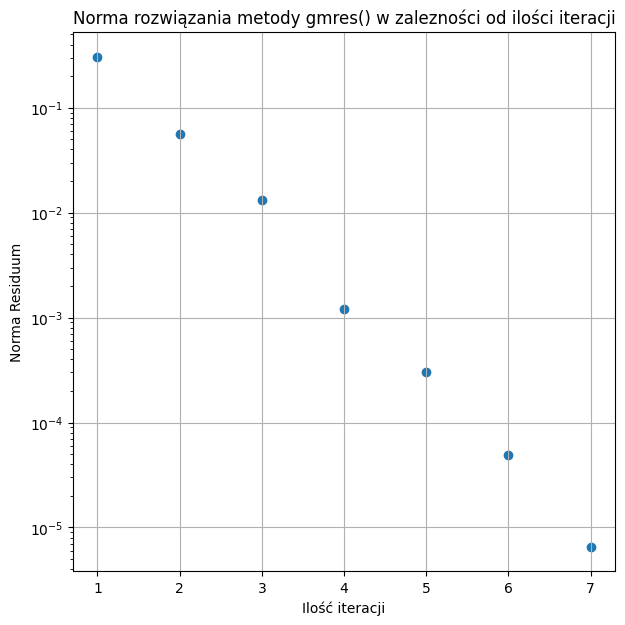

In [17]:
iter_24 = []
norm_24 = []
def c_func_24(y):
    norm_24.append(y)

r_24 = sp.sparse.linalg.gmres(A2, b2, restart=8, maxiter=1, callback=c_func_24, callback_type='pr_norm')
for i in range(1, len(norm_24)+1):
    iter_24.append(i)

fig4, gm_24 = plt.subplots(figsize=(7,7))
gm_24.scatter(iter_24, norm_24)
gm_24.set(yscale='log')
gm_24.set(xticks=iter_24)
gm_24.set(xlabel='Ilość iteracji', ylabel='Norma Residuum')
gm_24.grid()
gm_24.set_title('Norma rozwiązania metody gmres() w zalezności od ilości iteracji')

Text(0.5, 1.0, 'Czas wykonania metody gmres() w zalezności od ilości iteracji')

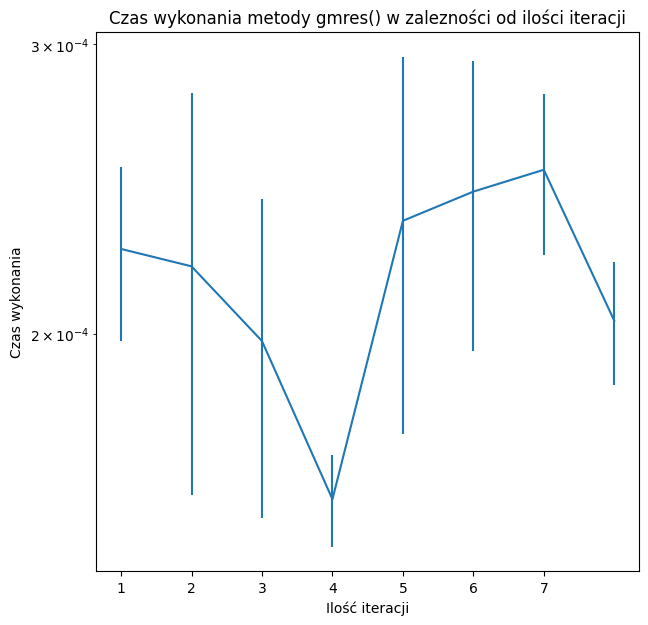

In [18]:
iterations = 8
iter_t24 = []
time_avg = np.zeros(iterations)
time_std_dev = np.zeros(iterations)
for i in range(1, iterations + 1):
    # print('Ilość iteracji: ', i)
    # print('Czas wykonania: ')
    saved_timing = %timeit -r 5 -n 10 -o -q sp.sparse.linalg.gmres(A2, b2, restart=i, maxiter=1)
    time_avg[i-1] = saved_timing.average
    time_std_dev[i-1] = saved_timing.stdev
    # print('-----------------------------------------------------')
    iter_t24.append(i)

fig5, gm_t24 = plt.subplots(figsize=(7,7))
gm_t24.errorbar(iter_t24, time_avg, yerr=time_std_dev)
gm_t24.set(yscale='log')
gm_t24.set(xticks=iter_24)
gm_t24.set(xlabel='Ilość iteracji', ylabel='Czas wykonania')
gm_t24.set_title('Czas wykonania metody gmres() w zalezności od ilości iteracji')

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

**solve()**

In [19]:
print(f'Warunki dla solve(): {main.solve_req(A3)}')

Warunki dla solve(): True


In [20]:
r_31 = np.linalg.solve(A3, b3)
norm_31 = main.residual_norm(A3, r_31, b3)

print('-----------------------------------------------------')
print(f'Dokładność rozwiązania funkcji solve(): {norm_31}')
print('-----------------------------------------------------')
print('Czas wykonania: ')
saved_timing = %timeit -r 5 -n 10 -o np.linalg.solve(A3, b3)
print('-----------------------------------------------------')

-----------------------------------------------------
Dokładność rozwiązania funkcji solve(): 4.070144838902081e-15
-----------------------------------------------------
Czas wykonania: 
28.5 µs ± 7.33 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
-----------------------------------------------------


**solve_jacobi()**

In [21]:
print(f'Warunki dla solve_jacobi(): {main.jacobi_req(A3)}')

Warunki dla solve_jacobi(): False


**cg()**

In [22]:
print(f'Warunki dla cg(): {main.cg_req(A3)}')

Warunki dla cg(): False


**gmres()**

In [23]:
print(f'Warunki dla gmres(): {main.gmres_req(A3)}')

Warunki dla gmres(): True


Text(0.5, 1.0, 'Norma rozwiązania metody gmres() w zalezności od ilości iteracji')

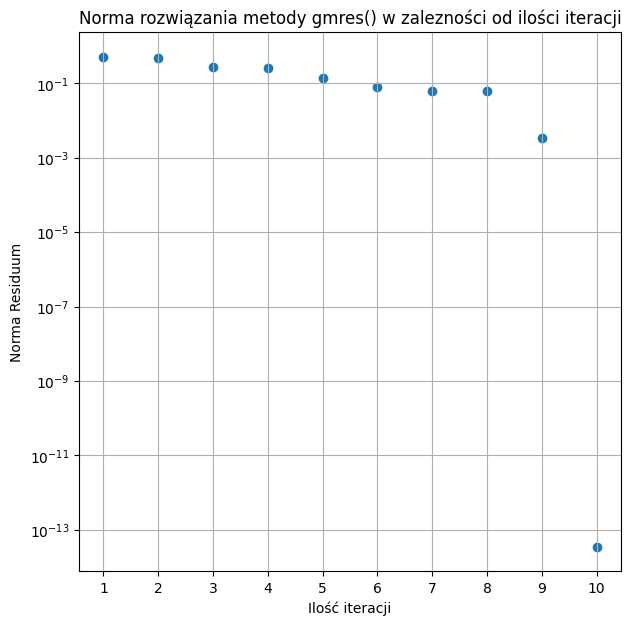

In [24]:
iter_34 = []
norm_34 = []
def c_func_34(y):
    norm_34.append(y)

r_34 = sp.sparse.linalg.gmres(A3, b3, restart=10, maxiter=1, callback=c_func_34, callback_type='pr_norm')
for i in range(1, len(norm_34)+1):
    iter_34.append(i)

fig4, gm_34 = plt.subplots(figsize=(7,7))
gm_34.scatter(iter_34, norm_34)
gm_34.set(yscale='log')
gm_34.set(xticks=iter_34)
gm_34.set(xlabel='Ilość iteracji', ylabel='Norma Residuum')
gm_34.grid()
gm_34.set_title('Norma rozwiązania metody gmres() w zalezności od ilości iteracji')

Text(0.5, 1.0, 'Czas wykonania metody gmres() w zalezności od ilości iteracji')

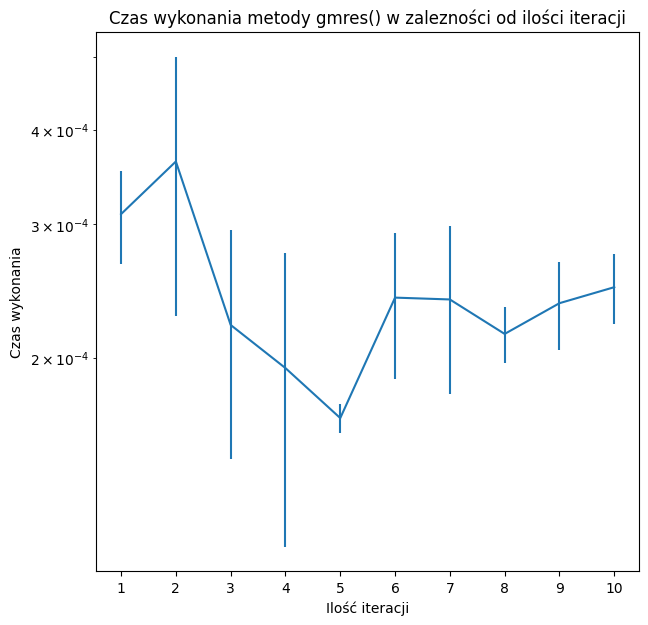

In [25]:
iterations = 10
iter_t34 = []
time_avg = np.zeros(iterations)
time_std_dev = np.zeros(iterations)
for i in range(1, iterations + 1):
    # print('Ilość iteracji: ', i)
    # print('Czas wykonania: ')
    saved_timing = %timeit -r 5 -n 10 -o -q sp.sparse.linalg.gmres(A3, b3, restart=i, maxiter=1)
    time_avg[i-1] = saved_timing.average
    time_std_dev[i-1] = saved_timing.stdev
    # print('-----------------------------------------------------')
    iter_t34.append(i)

fig5, gm_t34 = plt.subplots(figsize=(7,7))
gm_t34.errorbar(iter_t34, time_avg, yerr=time_std_dev)
gm_t34.set(yscale='log')
gm_t34.set(xticks=iter_34)
gm_t34.set(xlabel='Ilość iteracji', ylabel='Czas wykonania')
gm_t34.set_title('Czas wykonania metody gmres() w zalezności od ilości iteracji')

**Wnioski:**

Metoda solve jest najszybszą metodą rozwiązywania równań a także jej zastosowanie jest uniwersalne. Pozostałe metody które zostały wykorzystane mają pewne ograniczenia. Nie wszystkie macierze spełniały założenia poszczególnych metod, w związku z czym nie można było ich zastosować. Metoda solve() jest najszybszym sposobem odnajdywania rozwiązania i generuje ona błędy mniejszej wielkości niż pozostałe metody.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)